In [1]:
## This cell is for importing relevant libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
# Functions imported from: 'https://github.com/maxwellreynolds/Maze'
# Class vertex to keep track of the coordinates

class Vertex:
    def __init__(self,x_coord,y_coord):
        self.x=x_coord                                 #  x coordinate of the vertex
        self.y=y_coord                                 #  y coordinate of the vertex
        self.d=float('inf')                            #  distance from source
        self.parent_x=None                             #  defining parents of the current node to remember path
        self.parent_y=None  
        self.processed=False
        self.index_in_queue=None

# Function to return neighbors of the directly above, below, to the right and to the left
def get_neighbors(mat,r,c):
    shape=mat.shape
    neighbors=[]
    # Function to ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed:
         neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed:
            neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed:
            neighbors.append(mat[r][c+1])
    return neighbors

def bubble_up(queue, index):
    if index <= 0:
        return queue
    p_index=(index-1)//2
    if queue[index].d < queue[p_index].d:
            queue[index], queue[p_index]=queue[p_index], queue[index]
            queue[index].index_in_queue=index
            queue[p_index].index_in_queue=p_index
            quque = bubble_up(queue, p_index)
    return queue
    
def bubble_down(queue, index):
    length=len(queue)
    lc_index=2*index+1
    rc_index=lc_index+1
    if lc_index >= length:
        return queue
    if lc_index < length and rc_index >= length: 
        if queue[index].d > queue[lc_index].d:
            queue[index], queue[lc_index]=queue[lc_index], queue[index]
            queue[index].index_in_queue=index
            queue[lc_index].index_in_queue=lc_index
            queue = bubble_down(queue, lc_index)
    else:
        small = lc_index
        if queue[lc_index].d > queue[rc_index].d:
            small = rc_index
        if queue[small].d < queue[index].d:
            queue[index],queue[small]=queue[small],queue[index]
            queue[index].index_in_queue=index
            queue[small].index_in_queue=small
            queue = bubble_down(queue, small)
    return queue

def get_distance(img,u,v):
    return 0.1 + (float(img[v][0])-float(img[u][0]))**2+(float(img[v][1])-float(img[u][1]))**2+(float(img[v][2])-float(img[u][2]))**2

def drawPath(img,path, thickness=2):
    '''path is a list of (x,y) tuples'''
    x0,y0=path[0]
    for vertex in path[1:]:
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(255,0,0),thickness)
        x0,y0=vertex

In [3]:
# Functions imported from: 'https://github.com/maxwellreynolds/Maze'

# This function defines a min-heap priority queue
# In this type of heap, the value of parent node will always be less than or equal to the value of child node

def find_shortest_path(img,src,dst):
    pq=[] 
    source_x=src[0]
    source_y=src[1]
    dest_x=dst[0]
    dest_y=dst[1]
    imagerows,imagecols=img.shape[0],img.shape[1]
    matrix = np.full((imagerows, imagecols), None) #access by matrix[row][col]
    for r in range(imagerows):
        for c in range(imagecols):
            matrix[r][c]=Vertex(c,r)
            matrix[r][c].index_in_queue=len(pq)
            pq.append(matrix[r][c])
    matrix[source_y][source_x].d=0
    pq=bubble_up(pq, matrix[source_y][source_x].index_in_queue)
    
    while len(pq) > 0:
        u=pq[0]
        u.processed=True
        pq[0]=pq[-1]
        pq[0].index_in_queue=0
        pq.pop()
        pq=bubble_down(pq,0)
        neighbors = get_neighbors(matrix,u.y,u.x)
        for v in neighbors:
            dist=get_distance(img,(u.y,u.x),(v.y,v.x))
            if u.d + dist < v.d:
                v.d = u.d+dist
                v.parent_x=u.x
                v.parent_y=u.y
                idx=v.index_in_queue
                pq=bubble_down(pq,idx)
                pq=bubble_up(pq,idx)
                          
    path=[]
    iter_v=matrix[dest_y][dest_x]
    path.append((dest_x,dest_y))
    while(iter_v.y!=source_y or iter_v.x!=source_x):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.parent_y][iter_v.parent_x]

        
    path.append((source_x,source_y))
    return path

Enter image number (0-71): 0


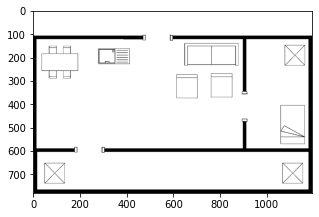

Enter number of agents: 1
Enter the X-coordinate of the 1th start node: 250
Enter the Y-coordinate of the 1th start node: 700
Enter number of fire origination points: 1
Enter the X-coordinate of the 1th fire origination point: 250
Enter the Y-coordinate of the 1th fire origination point: 400


In [4]:
img_no = int(input("Enter image number (0-69): "))                    # Index to access image from dataset

img = cv2.imread('../image_'+str(img_no)+'.png')     # Read image using opencv
plt.figure(figsize=(5,5))
plt.imshow(img)                                                       # Show the image on the screen 
plt.show()

start_lst = []                                                        # List to store starting points of agents
agent_no = int(input("Enter number of agents: ")) 
for i in range(agent_no):
    startx = int(input("Enter the X-coordinate of the "+str(i+1)+"th start node: ")) 
    starty = int(input("Enter the Y-coordinate of the "+str(i+1)+"th start node: ")) 
    start_lst.append((startx,starty))

fire_no = int(input("Enter number of fire origination points: ")) 
fire_orig = []                                                        # List to store starting points of fire
for i in range(fire_no):
    fire_origx = int(input("Enter the X-coordinate of the "+str(i+1)+"th fire origination point: ")) 
    fire_origy = int(input("Enter the Y-coordinate of the "+str(i+1)+"th fire origination point: "))
    fire_orig.append((fire_origx,fire_origy))
    
# Praharsh Nanavati

In [5]:
# Manually curated dictionary for the endpoints of each processed image in the dataset

end_point_dict = {0:(530,100), 1:(350,800), 2:(100,580), 3:(820,1200), 4:(200,490), 5:(720,1040),
                 6:(720,1040),7:(900,130), 8:(980,700), 9:(10,200), 10:(100,1200),11:(920,600),
                 12:(560,120),13:(1030,720),14:(760,580),15:(870,900),16:(700,10),17:(1180,820),
                 18:(1000,120),19:(100,1180),20:(205,100),21:(205,100),22:(980,530),23:(400,800),
                 24:(980,520),25:(490,720),26:(900,120),27:(420,350),28:(1180,130),29:(170,130),
                 30:(100,500),31:(500,1180),32:(200,940),33:(100,1180),34:(20,700),35:(1030,720),
                 36:(1180,170),37:(560,1100),38:(750,1000),39:(100,550),40:(300,900),41:(250,1100),
                 42:(1200,10),43:(500,1600),44:(840,1570),45:(250,520),46:(550,100),47:(100,1000),
                 48:(1550,835),49:(530,1300),50:(1300,370),51:(130,1365),52:(280,500),53:(250,500),
                 54:(1300,540),55:(2250,950),56:(1570,530),57:(710,950),58:(1570,830),59:(840,130),
                 60:(770,520),61:(480,440),62:(920,1550),63:(250,1100),64:(400,1600),65:(1200,520),
                 66:(1550,840),67:(100,1350),68:(120,550),69:(770,760)}


end = end_point_dict[img_no]

# Devesh Sharma

In [6]:
img = cv2.imread('../image_'+str(img_no)+'.png')

shortest_list = []  # List for storing shortest paths for agents

for i in range(agent_no):
    shortest_list.append(find_shortest_path(img, start_lst[i], end))

shortest_list_gradient = []
for z in range(agent_no):                                          
    for i in range(0,len(shortest_list[z]),100):
        for j in range(fire_no):
            cv2.circle(img, fire_orig[j], int(i/10), (0,0,0), -1) # Fire addition as obstacle
    shortest_list_gradient.append(find_shortest_path(img,start_lst[z],shortest_list[z][len(shortest_list[z])-i-1])) # Best path post fire spreading
    
# Praharsh Nanavati, R S Anudeep

In [7]:
for i in range(len(shortest_list_gradient)):
        shortest_list_gradient[i] = shortest_list_gradient[i][::-1] # Path needed to be reversed as start point was at the end of the list

In [8]:
maxlen = 0
for i in range(len(shortest_list)):
    if(len(shortest_list[i]) > maxlen):
        maxlen = len(shortest_list[i]) 
        
# maxlen required for gif formation. 
# if one agent reaches the end, the calculation should not stop for the remaining ones.

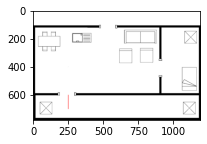

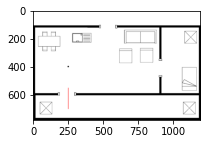

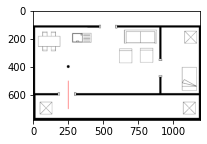

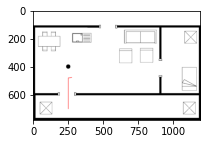

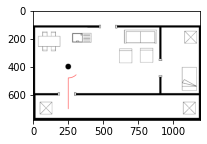

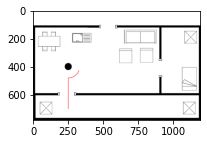

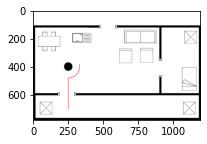

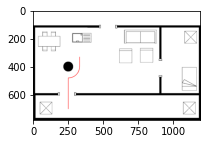

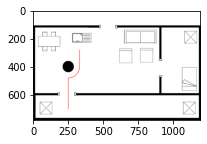

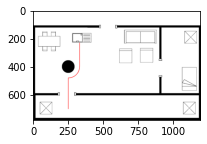

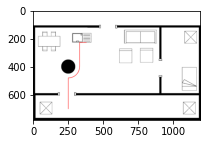

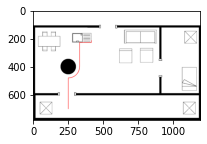

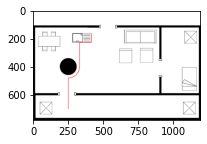

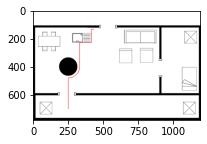

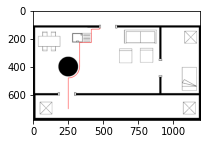

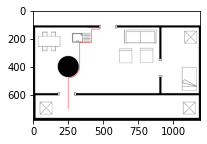

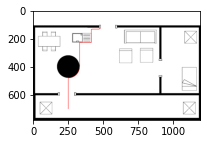

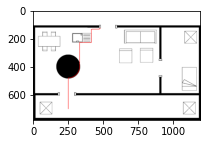

In [9]:
img_lst = []
for i in range(0,maxlen,50):
    img_cp = cv2.imread('../image_'+str(img_no)+'.png')
    for j in range(fire_no):
        cv2.circle(img_cp, fire_orig[j], int(i/10), (0,0,0), -1)
    for z in range(agent_no):
        drawPath(img_cp,shortest_list_gradient[z][:i+100]) # slicing for gif instances
    plt.figure(figsize=(3,3))
    plt.imshow(img_cp) # show the image on the screen 
    plt.show()
    img_lst.append(img_cp)

# Devesh Sharma

In [10]:
import imageio
imageio.mimsave('output.gif', img_lst)

# R S Anudeep

In [11]:
import pyglet

# pick an animated gif file you have in the working directory
ag_file = "output.gif"
animation = pyglet.resource.animation(ag_file)
sprite = pyglet.sprite.Sprite(animation)

# create a window and set it to the image size
win = pyglet.window.Window(width=sprite.width, height=sprite.height)

# set window background color = r, g, b, alpha
# each value goes from 0.0 to 1.0
green = 0, 1, 0, 1
pyglet.gl.glClearColor(*green)

@win.event
def on_draw():
    win.clear()
    sprite.draw()

pyglet.app.run()
# R S Anudeep